# Natural disaster risk assessment and planning using Dimensionality Reduction Algortihm :

In [22]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\Tamilselvan M\Downloads\ML\new_natural_disasters_2024.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Disaster_ID Disaster_Type   Location  Magnitude              Date  \
0            1      Wildfire     Brazil   6.267393  01-01-2024 00:00   
1            2     Hurricane  Indonesia   6.649358  01-01-2024 01:00   
2            3       Tornado      China   9.724366  01-01-2024 02:00   
3            4         Flood      India   1.702505  01-01-2024 03:00   
4            5         Flood     Brazil   7.917748  01-01-2024 04:00   

   Fatalities  Economic_Loss($)  \
0        9706      6.509790e+08   
1        2233      5.538357e+08   
2         478      6.910998e+07   
3        2867      8.474880e+08   
4         776      6.449297e+08   

                              Mitigation_Measures  
0  Create fire breaks, public awareness campaigns  
1            Strengthen levees, evacuation drills  
2            Storm shelters, rapid response units  
3  Build flood barriers, improve drainage systems  
4  Build flood barriers, improve drainage systems  


In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_features = ['Magnitude', 'Fatalities', 'Economic_Loss($)']  # Adjust based on your dataset
X = data[numerical_features]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
import numpy as np

# Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select top k principal components (e.g., k=2)
k = 2
principal_components = eigenvectors[:, :k]

# Transform the data
reduced_data = np.dot(X_scaled, principal_components)

print("Reduced Data:")
print(reduced_data[:5])  # Display the first 5 rows of reduced data


Reduced Data:
[[ 1.07856625  0.4168653 ]
 [-0.89598674  0.36068429]
 [-2.53672986 -0.89307418]
 [ 0.78758771  0.81592869]
 [-1.490072    0.8413843 ]]


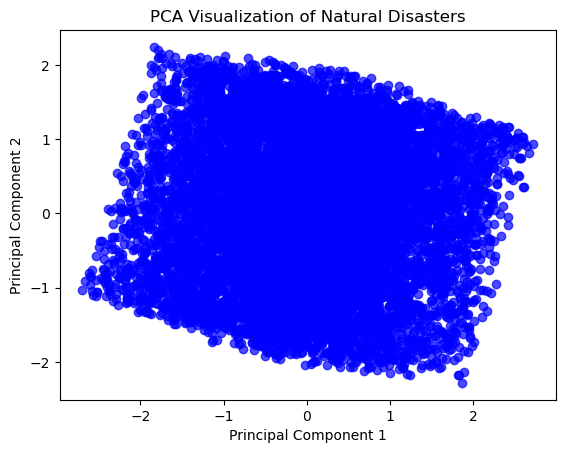

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.7)
plt.title("PCA Visualization of Natural Disasters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [26]:
# Example: Cluster based on reduced data (manually, if no sklearn)
# We'll group disasters by a threshold of Principal Component 1
risk_groups = ["High Risk" if x[0] > 1 else "Low Risk" for x in reduced_data]

# Add risk groups back to the original dataset
data['Risk_Group'] = risk_groups
print(data[['Disaster_Type', 'Location', 'Risk_Group']].head())


  Disaster_Type   Location Risk_Group
0      Wildfire     Brazil  High Risk
1     Hurricane  Indonesia   Low Risk
2       Tornado      China   Low Risk
3         Flood      India   Low Risk
4         Flood     Brazil   Low Risk


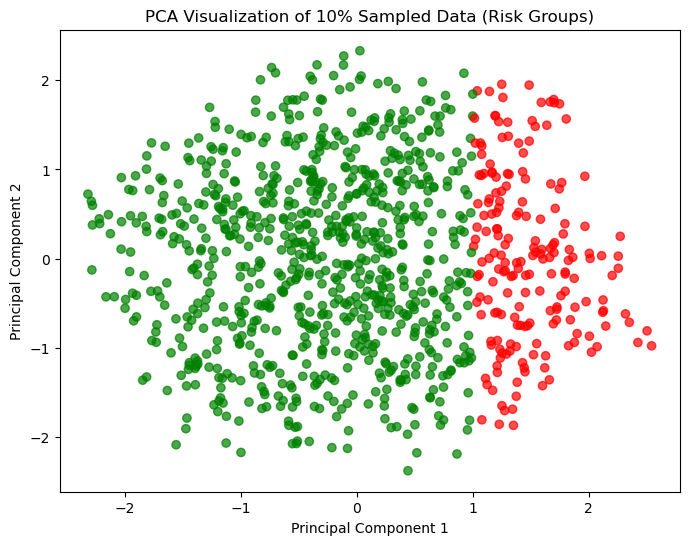

In [18]:
# Example: Add a risk group column
risk_group = ["High Risk" if x[0] > 1 else "Low Risk" for x in reduced_data]

# Map colors for risk groups
colors = ['red' if rg == "High Risk" else 'green' for rg in risk_group]

# Plot with colors
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, alpha=0.7)
plt.title("PCA Visualization of 10% Sampled Data (Risk Groups)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
